In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
batting_2018 = pd.read_csv("Resources/2018/2018batting.csv")
fielding_2018 = pd.read_csv("Resources/2018/2018fielding.csv")
pitching_2018 = pd.read_csv("Resources/2018/2018pitching.csv")

batting_2019 = pd.read_csv("Resources/2019/2019batting.csv")
fielding_2019 = pd.read_csv("Resources/2019/2019fielding.csv")
pitching_2019 = pd.read_csv("Resources/2019/2019pitching.csv")

batting_2021 = pd.read_csv("Resources/2021/2021batting.csv")
fielding_2021 = pd.read_csv("Resources/2021/2021fielding.csv")
pitching_2021 = pd.read_csv("Resources/2021/2021pitching.csv")

batting_2022 = pd.read_csv("Resources/2022/2022batting.csv")
fielding_2022 = pd.read_csv("Resources/2022/2022fielding.csv")
pitching_2022 = pd.read_csv("Resources/2022/2022pitching.csv")

batting_2023 = pd.read_csv("Resources/2023/2023batting.csv")
fielding_2023 = pd.read_csv("Resources/2023/2023fielding.csv")
pitching_2023 = pd.read_csv("Resources/2023/2023pitching.csv")

batting_2024 = pd.read_csv("Resources/2024/2024batting.csv")
fielding_2024 = pd.read_csv("Resources/2024/2024fielding.csv")
pitching_2024 = pd.read_csv("Resources/2024/2024pitching.csv")

In [3]:
batfield_2018 = pd.merge(batting_2018, fielding_2018, on = 'Tm')

full_2018 = pd.merge(batfield_2018, pitching_2018, on='Tm')

full_2018

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y
0,Arizona Diamondbacks,49,29.2,4.28,162,6157,5460,693,1283,259,...,6139,113,3.91,1.254,8.1,1.1,3.2,8.9,2.77,1106
1,Atlanta Braves,58,27.3,4.69,162,6251,5582,759,1433,314,...,6155,110,3.98,1.284,7.6,0.9,3.9,8.8,2.24,1128
2,Baltimore Orioles,56,28.4,3.84,162,6034,5507,622,1317,242,...,6340,83,4.98,1.496,9.8,1.5,3.7,7.6,2.04,1155
3,Boston Red Sox,44,27.7,5.41,162,6302,5623,876,1509,355,...,6166,118,3.82,1.246,8.1,1.1,3.2,9.6,3.04,1143
4,Chicago Cubs,50,27.2,4.67,163,6369,5624,761,1453,286,...,6264,115,4.13,1.315,8.0,1.0,3.8,8.1,2.14,1190
5,Chicago White Sox,51,26.5,4.05,162,6071,5523,656,1332,259,...,6339,88,4.73,1.431,8.8,1.2,4.1,7.9,1.93,1180
6,Cincinnati Reds,53,27.2,4.30,162,6240,5532,696,1404,251,...,6279,90,4.66,1.404,9.3,1.4,3.3,7.9,2.36,1137
7,Cleveland Indians,49,29.4,5.05,162,6300,5595,818,1447,297,...,6071,115,3.78,1.205,8.3,1.2,2.5,9.5,3.79,1051
8,Colorado Rockies,41,28.7,4.79,163,6178,5541,780,1418,280,...,6154,109,4.06,1.310,8.5,1.1,3.3,8.7,2.68,1052
9,Detroit Tigers,49,27.9,3.89,162,6029,5494,630,1326,284,...,6130,98,4.58,1.343,9.0,1.4,3.1,7.7,2.47,1058


In [4]:
full_2018.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       '#Fld', 'RA/G_x', 'DefEff', 'G_y', 'GS_x', 'CG_x', 'Inn', 'Ch', 'PO',
       'A', 'E', 'DP', 'Fld%', 'Rtot', 'Rtot/yr', 'Rdrs', 'Rdrs/yr', 'Rgood',
       '#P', 'PAge', 'RA/G_y', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS_y', 'GF',
       'CG_y', 'tSho', 'cSho', 'SV', 'IP', 'H_y', 'R_y', 'ER', 'HR_y', 'BB_y',
       'IBB_y', 'SO_y', 'HBP_y', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9',
       'HR9', 'BB9', 'SO9', 'SO/W', 'LOB_y'],
      dtype='object')

In [5]:
columns_to_drop = ['W', 'L', 'W-L%','RA/G_x']
full_2018.drop(columns=columns_to_drop, inplace=True)

full_2018.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       '#Fld', 'DefEff', 'G_y', 'GS_x', 'CG_x', 'Inn', 'Ch', 'PO', 'A', 'E',
       'DP', 'Fld%', 'Rtot', 'Rtot/yr', 'Rdrs', 'Rdrs/yr', 'Rgood', '#P',
       'PAge', 'RA/G_y', 'ERA', 'G', 'GS_y', 'GF', 'CG_y', 'tSho', 'cSho',
       'SV', 'IP', 'H_y', 'R_y', 'ER', 'HR_y', 'BB_y', 'IBB_y', 'SO_y',
       'HBP_y', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9', 'BB9',
       'SO9', 'SO/W', 'LOB_y'],
      dtype='object')

In [6]:
print(full_2018['Tm'].values)

['Arizona Diamondbacks' 'Atlanta Braves' 'Baltimore Orioles'
 'Boston Red Sox' 'Chicago Cubs' 'Chicago White Sox' 'Cincinnati Reds'
 'Cleveland Indians' 'Colorado Rockies' 'Detroit Tigers' 'Houston Astros'
 'Kansas City Royals' 'Los Angeles Angels' 'Los Angeles Dodgers'
 'Miami Marlins' 'Milwaukee Brewers' 'Minnesota Twins' 'New York Mets'
 'New York Yankees' 'Oakland Athletics' 'Philadelphia Phillies'
 'Pittsburgh Pirates' 'San Diego Padres' 'Seattle Mariners'
 'San Francisco Giants' 'St. Louis Cardinals' 'Tampa Bay Rays'
 'Texas Rangers' 'Toronto Blue Jays' 'Washington Nationals'
 'League Average' nan]


In [7]:
def playoff_teams(Tm):
    if Tm in ['Chicago Cubs', 'Colorado Rockies', 'Oakland Athletics', 'New York Yankees','Los Angeles Dodgers', 'Atlanta Braves','Milwaukee Brewers', 'Houston Astros', 'Cleveland Indians','Boston Red Sox']:
        return '1'
    else:
        return '0'

# Apply the function to create a new column 'Category' based on 'Fruit' column
full_2018['playoffs'] = full_2018['Tm'].apply(playoff_teams)

full_2018

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y,playoffs
0,Arizona Diamondbacks,49,29.2,4.28,162,6157,5460,693,1283,259,...,113,3.91,1.254,8.1,1.1,3.2,8.9,2.77,1106,0
1,Atlanta Braves,58,27.3,4.69,162,6251,5582,759,1433,314,...,110,3.98,1.284,7.6,0.9,3.9,8.8,2.24,1128,1
2,Baltimore Orioles,56,28.4,3.84,162,6034,5507,622,1317,242,...,83,4.98,1.496,9.8,1.5,3.7,7.6,2.04,1155,0
3,Boston Red Sox,44,27.7,5.41,162,6302,5623,876,1509,355,...,118,3.82,1.246,8.1,1.1,3.2,9.6,3.04,1143,1
4,Chicago Cubs,50,27.2,4.67,163,6369,5624,761,1453,286,...,115,4.13,1.315,8.0,1.0,3.8,8.1,2.14,1190,1
5,Chicago White Sox,51,26.5,4.05,162,6071,5523,656,1332,259,...,88,4.73,1.431,8.8,1.2,4.1,7.9,1.93,1180,0
6,Cincinnati Reds,53,27.2,4.30,162,6240,5532,696,1404,251,...,90,4.66,1.404,9.3,1.4,3.3,7.9,2.36,1137,0
7,Cleveland Indians,49,29.4,5.05,162,6300,5595,818,1447,297,...,115,3.78,1.205,8.3,1.2,2.5,9.5,3.79,1051,1
8,Colorado Rockies,41,28.7,4.79,163,6178,5541,780,1418,280,...,109,4.06,1.310,8.5,1.1,3.3,8.7,2.68,1052,1
9,Detroit Tigers,49,27.9,3.89,162,6029,5494,630,1326,284,...,98,4.58,1.343,9.0,1.4,3.1,7.7,2.47,1058,0


In [8]:
full_2018.set_index('Tm', inplace=True)

full_2018

,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,3B,...,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y,playoffs
Tm,,,,,,,,,,,,,,,,,,,,,
Arizona Diamondbacks,49,29.2,4.28,162,6157,5460,693,1283,259,50,...,113,3.91,1.254,8.1,1.1,3.2,8.9,2.77,1106,0
Atlanta Braves,58,27.3,4.69,162,6251,5582,759,1433,314,29,...,110,3.98,1.284,7.6,0.9,3.9,8.8,2.24,1128,1
Baltimore Orioles,56,28.4,3.84,162,6034,5507,622,1317,242,15,...,83,4.98,1.496,9.8,1.5,3.7,7.6,2.04,1155,0
Boston Red Sox,44,27.7,5.41,162,6302,5623,876,1509,355,31,...,118,3.82,1.246,8.1,1.1,3.2,9.6,3.04,1143,1
Chicago Cubs,50,27.2,4.67,163,6369,5624,761,1453,286,34,...,115,4.13,1.315,8.0,1.0,3.8,8.1,2.14,1190,1
Chicago White Sox,51,26.5,4.05,162,6071,5523,656,1332,259,40,...,88,4.73,1.431,8.8,1.2,4.1,7.9,1.93,1180,0
Cincinnati Reds,53,27.2,4.30,162,6240,5532,696,1404,251,25,...,90,4.66,1.404,9.3,1.4,3.3,7.9,2.36,1137,0
Cleveland Indians,49,29.4,5.05,162,6300,5595,818,1447,297,19,...,115,3.78,1.205,8.3,1.2,2.5,9.5,3.79,1051,1
Colorado Rockies,41,28.7,4.79,163,6178,5541,780,1418,280,42,...,109,4.06,1.310,8.5,1.1,3.3,8.7,2.68,1052,1


In [9]:
full_2018.drop(index=full_2018.index[-2:], inplace=True)

full_2018

,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,3B,...,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y,playoffs
Tm,,,,,,,,,,,,,,,,,,,,,
Arizona Diamondbacks,49,29.2,4.28,162,6157,5460,693,1283,259,50,...,113,3.91,1.254,8.1,1.1,3.2,8.9,2.77,1106,0
Atlanta Braves,58,27.3,4.69,162,6251,5582,759,1433,314,29,...,110,3.98,1.284,7.6,0.9,3.9,8.8,2.24,1128,1
Baltimore Orioles,56,28.4,3.84,162,6034,5507,622,1317,242,15,...,83,4.98,1.496,9.8,1.5,3.7,7.6,2.04,1155,0
Boston Red Sox,44,27.7,5.41,162,6302,5623,876,1509,355,31,...,118,3.82,1.246,8.1,1.1,3.2,9.6,3.04,1143,1
Chicago Cubs,50,27.2,4.67,163,6369,5624,761,1453,286,34,...,115,4.13,1.315,8.0,1.0,3.8,8.1,2.14,1190,1
Chicago White Sox,51,26.5,4.05,162,6071,5523,656,1332,259,40,...,88,4.73,1.431,8.8,1.2,4.1,7.9,1.93,1180,0
Cincinnati Reds,53,27.2,4.30,162,6240,5532,696,1404,251,25,...,90,4.66,1.404,9.3,1.4,3.3,7.9,2.36,1137,0
Cleveland Indians,49,29.4,5.05,162,6300,5595,818,1447,297,19,...,115,3.78,1.205,8.3,1.2,2.5,9.5,3.79,1051,1
Colorado Rockies,41,28.7,4.79,163,6178,5541,780,1418,280,42,...,109,4.06,1.310,8.5,1.1,3.3,8.7,2.68,1052,1


In [10]:
# Define features set
X = full_2018.copy()
X.drop("playoffs", axis=1, inplace=True)
X.head()

,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,3B,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y
Tm,,,,,,,,,,,,,,,,,,,,,
Arizona Diamondbacks,49,29.2,4.28,162,6157,5460,693,1283,259,50,...,6139,113,3.91,1.254,8.1,1.1,3.2,8.9,2.77,1106
Atlanta Braves,58,27.3,4.69,162,6251,5582,759,1433,314,29,...,6155,110,3.98,1.284,7.6,0.9,3.9,8.8,2.24,1128
Baltimore Orioles,56,28.4,3.84,162,6034,5507,622,1317,242,15,...,6340,83,4.98,1.496,9.8,1.5,3.7,7.6,2.04,1155
Boston Red Sox,44,27.7,5.41,162,6302,5623,876,1509,355,31,...,6166,118,3.82,1.246,8.1,1.1,3.2,9.6,3.04,1143
Chicago Cubs,50,27.2,4.67,163,6369,5624,761,1453,286,34,...,6264,115,4.13,1.315,8.0,1.0,3.8,8.1,2.14,1190


In [11]:
# Define target vector
y = full_2018["playoffs"].ravel()
y[:5]

array(['0', '1', '0', '1', '1'], dtype=object)

In [12]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [13]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [14]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [15]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [16]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [17]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [18]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [19]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [20]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4,1
Actual 1,0,3


Accuracy Score : 0.875
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.75      1.00      0.86         3

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8



## Feature Importance

In [21]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
feature_importances = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

feature_importances

[(0.09447637133200854, 'R/G'),
 (0.07655106866785173, 'R_x'),
 (0.07547605401134812, 'RBI'),
 (0.07332546049008896, 'OPS'),
 (0.0690587050947848, 'TB'),
 (0.05513549510194315, 'PA'),
 (0.052028314060666984, 'AB'),
 (0.040440946106006494, 'SLG'),
 (0.03784965165553401, 'OBP'),
 (0.03779931528166822, 'ERA+'),
 (0.030098528505419254, 'H9'),
 (0.026363824247647768, 'H_x'),
 (0.025650280056523284, 'RA/G_y'),
 (0.023024724376930254, 'Rtot'),
 (0.020079805784493282, 'H_y'),
 (0.016352560698424664, 'SV'),
 (0.015983650957177742, 'ER'),
 (0.014755160012723034, 'Inn'),
 (0.014191611239637553, 'BA'),
 (0.012798729257784981, 'OPS+'),
 (0.01252356891474538, 'IP'),
 (0.01102065527065527, 'Rtot/yr'),
 (0.00994788556626354, 'ERA'),
 (0.00988257238792953, 'WHIP'),
 (0.009698173585673583, 'PO'),
 (0.008693020541549952, 'DP'),
 (0.008599813258636785, 'G'),
 (0.0075962301587301564, 'R_y'),
 (0.007370634920634918, 'SO_y'),
 (0.007289838607507779, 'GS_x'),
 (0.0066815568332596175, 'G_x'),
 (0.00602021720969

In [22]:
feature_importances_df= pd.DataFrame(feature_importances)

feature_importances_df.set_index(1, inplace=True)

feature_importances_df.drop(index=feature_importances_df.index[-55:], inplace=True)

feature_importances_df

,0
1,
R/G,0.094476
R_x,0.076551
RBI,0.075476
OPS,0.073325
TB,0.069059
PA,0.055135
AB,0.052028
SLG,0.040441
OBP,0.037850


<Axes: title={'center': 'Most Important Stats'}>

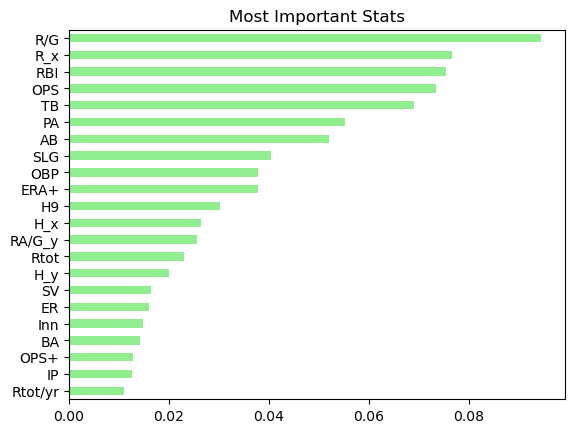

In [26]:
# Visualize the features by importance

# feature_importances_df.rename(columns={0: 'feature importances'}, inplace=True)
importances_sorted = feature_importances_df.sort_values(by='feature importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Most Important Stats', ylabel='', legend=False)